# **Predicting House Prices: Exploratory Data Analysis and Linear Regression Modeling**




# **Importing the required libraries**

In [1]:
import numpy as np   # Importing the numpy library for numerical computations
import pandas as pd  # Importing the pandas library for data manipulation and analysis
import matplotlib.pyplot as plt  # Importing the matplotlib library for plotting graphs
import seaborn as sns  # Importing the seaborn library for enhanced data visualization
from sklearn.model_selection import train_test_split # Importing the train_test_split function from sklearn.model_selection module
from sklearn.preprocessing import MinMaxScaler # Import the MinMaxScaler from sklearn.preprocessing module
from sklearn.linear_model import LinearRegression  # Importing the LinearRegression model from scikit-learn
from sklearn.metrics import r2_score  # Importing the r2_score function from the sklearn.metrics module

# **Importing our dataset**

In [2]:
data = pd.read_csv('/content/Housing.csv')  # Reading a CSV file and storing the data in a pandas DataFrame called 'data'
data.head()  # Displaying the first few rows of the DataFrame 'data'

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# Displaying our data from the end
data.tail(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


# **Understanding our data**

In [4]:
# Shape of our data
print("Rows and Columns of the dataset :- ",data.shape)

Rows and Columns of the dataset :-  (545, 13)


In [5]:
# Identifying information about composition and potential data quality
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

# Columns or Features Description

1. 'price': The price of the house (target variable).
2. 'area': The area or size of the house in square feet.
3. 'bedrooms': The number of bedrooms in the house.
4. 'bathrooms': The number of bathrooms in the house.
5. 'stories': The number of stories or floors in the house.
6. 'mainroad': Categorical variable indicating whether the house is located near the main road or not.
7. 'guestroom': Categorical variable indicating whether the house has a guest room or not.
8. 'basement': Categorical variable indicating whether the house has a basement or not.
9. 'hotwaterheating': Categorical variable indicating whether the house has hot water heating or not.
10. 'airconditioning': Categorical variable indicating whether the house has air conditioning or not.
11. 'parking': The number of parking spaces available with the house.
12. 'prefarea': Categorical variable indicating whether the house is in a preferred area or not.
13. 'furnishingstatus': The furnishing status of the house (e.g., unfurnished, semi-furnished, fully furnished).










In [7]:
# To show statistical summary of the columns of our data
data.describe(include ='all')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


# **Checking NULL Values**

In [8]:
# To count the null values
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

The inference we can make after checking for null values and finding that there are no null values in any of the columns is that the dataset is complete in terms of missing values.

Having no null values is beneficial because it allows us to work with the entire dataset without the need for imputation or handling missing data. We can proceed with further data analysis, visualization, and modeling.

# **Performing EDA**


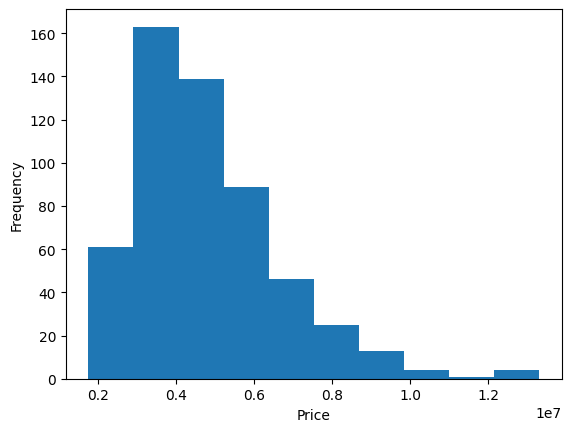

In [9]:
# Histogram of 'price'
plt.hist(data['price'])
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


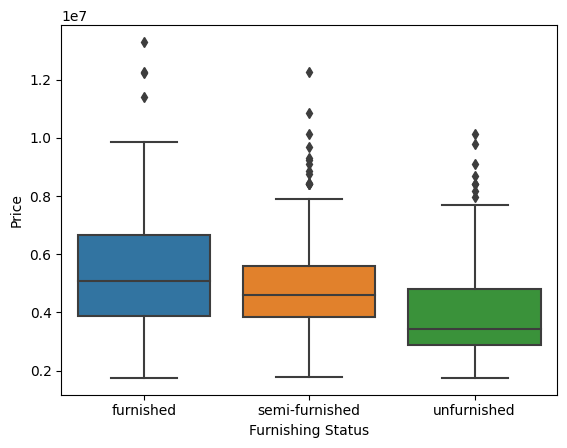

In [10]:
# Box plot of 'price' vs. 'furnishingstatus'
sns.boxplot(x='furnishingstatus', y='price', data=data)
plt.xlabel('Furnishing Status')
plt.ylabel('Price')
plt.show()

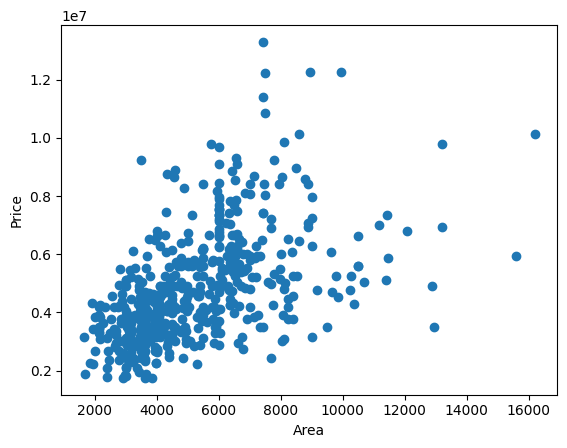

In [11]:
# Scatter plot of 'area' vs. 'price'
plt.scatter(data['area'], data['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

<ipython-input-12-edf476a68ac6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


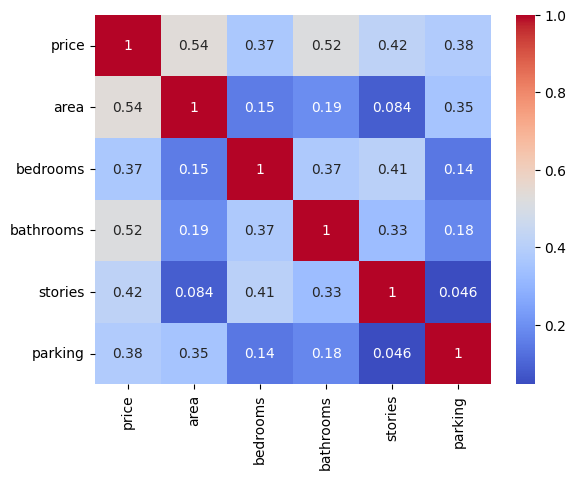

In [12]:
# Heatmap of correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm')
plt.show()

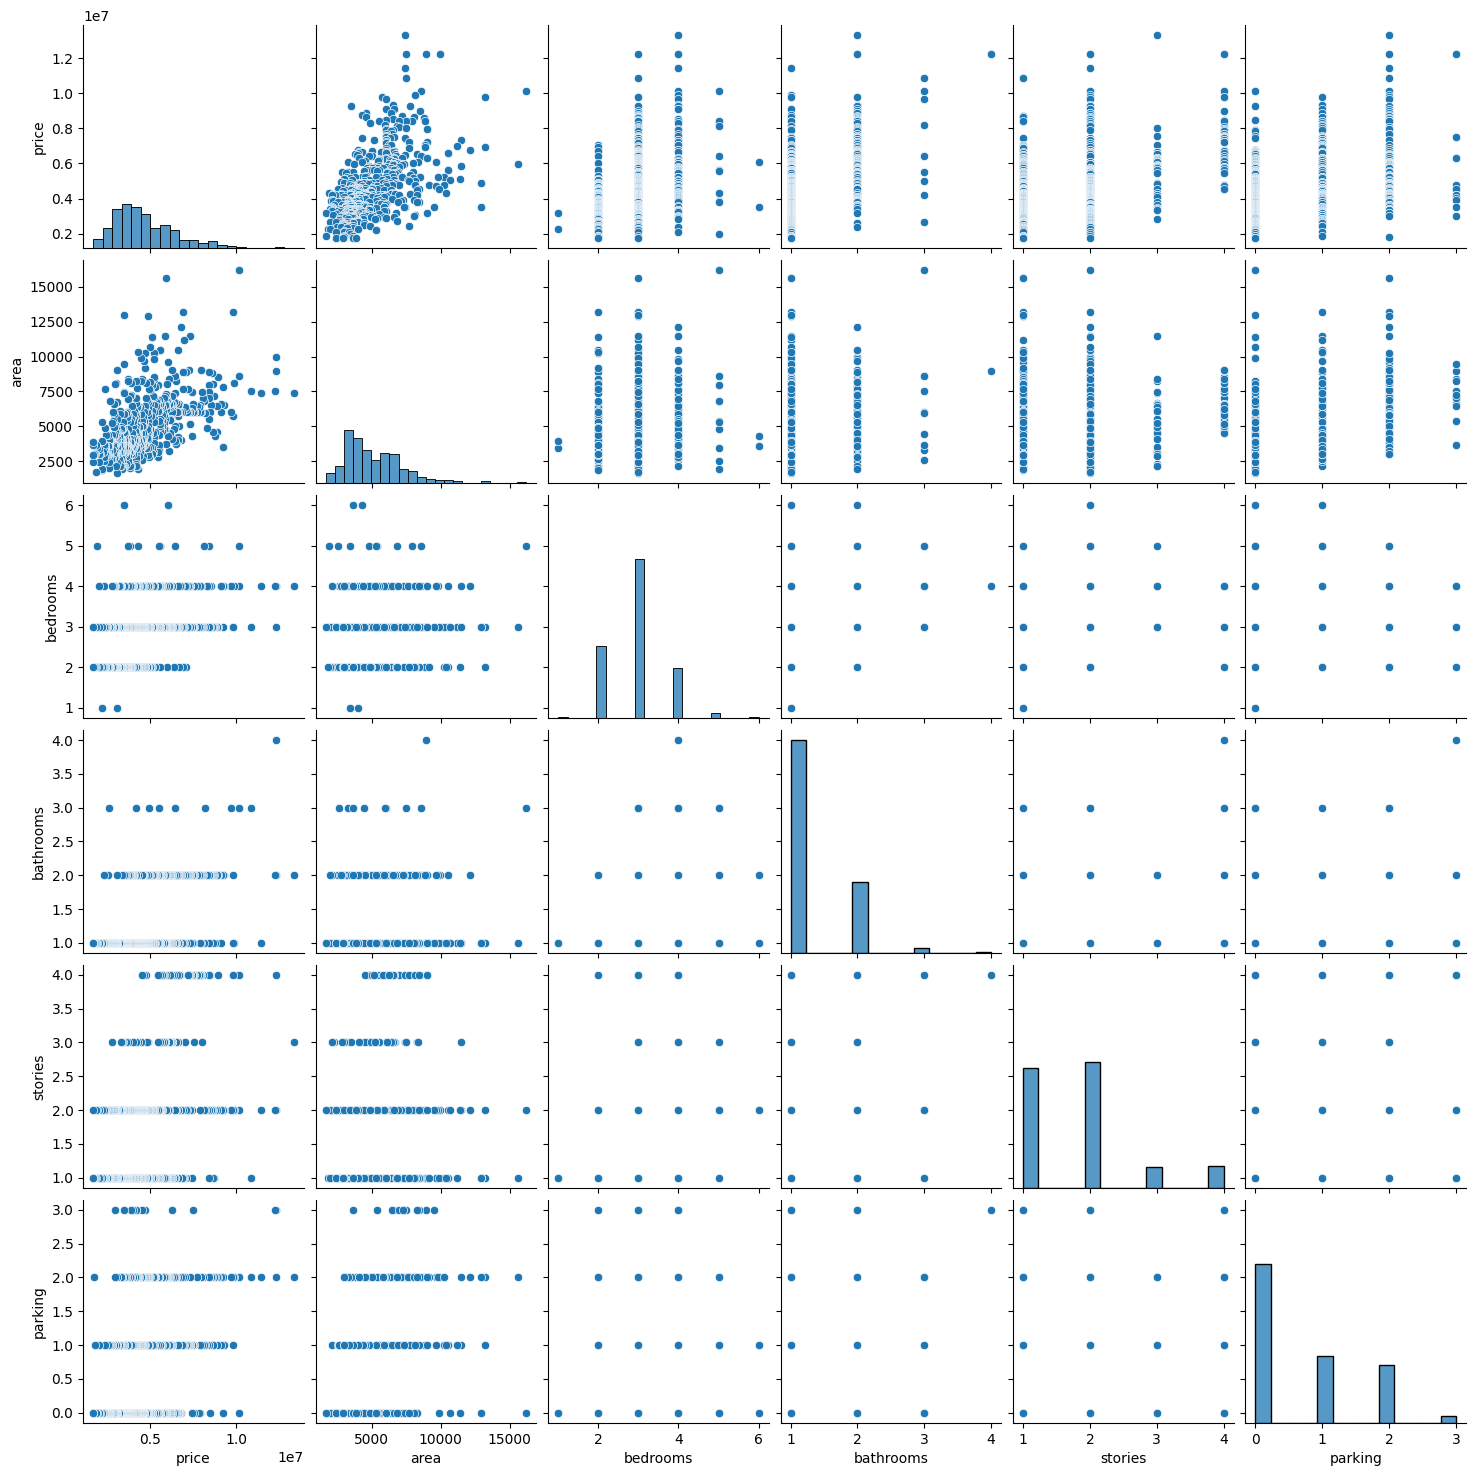

In [13]:
sns.pairplot(data)
plt.show()

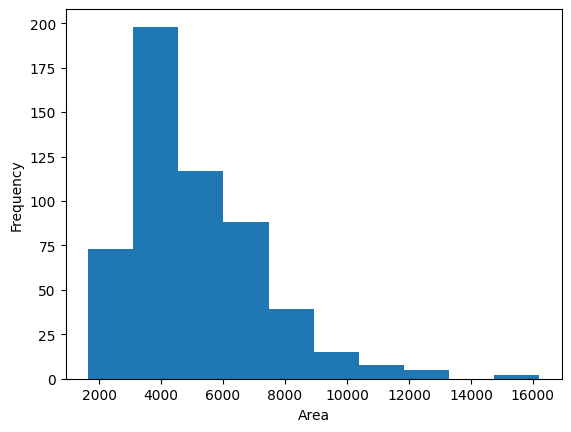

In [14]:
# Histogram of 'area'
plt.hist(data['area'], bins=10)
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

<ipython-input-15-d6bf2d974db7>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['price'], shade=True)


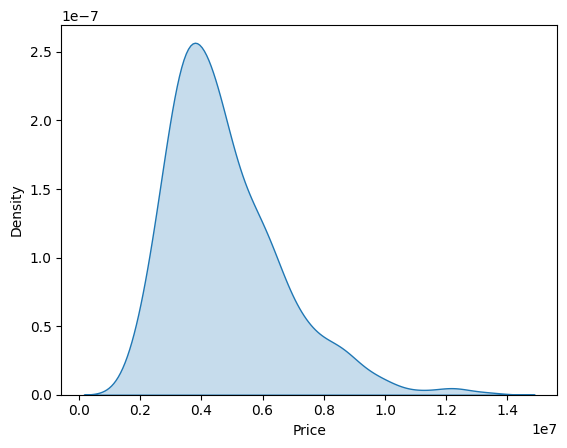

In [15]:
# Kernel Density Estimate (KDE) plot of 'price'
sns.kdeplot(data['price'], shade=True)
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

# **Data Cleaning and Preparation**


Before we move further lets understand what all are the changes we have to make in our dataset to prepare it for modelling. Some columns in our dataset contains categorical variables with "yes" and "no" values. In such cases, it is often necessary to make changes to these columns for further analysis or modeling. Here are some inferences for handling these columns:

1. Binary Categorical Variables:

* Columns such as 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', and 'prefarea' contain binary categorical variables with "yes" and "no" values.    


* To facilitate analysis and modeling, we can consider converting these variables to numeric values, such as 1 for "yes" and 0 for "no". This conversion allows the variables to be treated as binary variables rather than string values.

2. Dummy Variables:

* The 'furnishingstatus' column represents categorical variables indicating the furnishing status of the house, such as "unfurnished", "semi-furnished", and "fully furnished".
* To incorporate this categorical information into the analysis or modeling process, it is common to create dummy variables.
* Dummy variables are binary variables representing each category as a separate column, where a value of 1 indicates that a particular category is present and 0 otherwise.


1. Handling Binary Categorical Variables (Yes/No) Categories

In [17]:
# List of categorical columns containing 'yes' and 'no' values
categorical_col =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

In [18]:
data[categorical_col]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes
1,yes,no,no,no,yes,no
2,yes,no,yes,no,no,yes
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,yes,no
...,...,...,...,...,...,...
540,yes,no,yes,no,no,no
541,no,no,no,no,no,no
542,yes,no,no,no,no,no
543,no,no,no,no,no,no


In [20]:

def binary_map(x):
    """
    Function to map 'yes' and 'no' values to 1 and 0, respectively.

    Parameters:
    x (pandas Series): Input Series containing 'yes' and 'no' values.

    Returns:
    pandas Series: Mapped Series with 'yes' mapped to 1 and 'no' mapped to 0.
    """
    return x.map({'yes': 1, 'no': 0})

In [21]:
# Apply the binary_map function to multiple categorical columns in the 'data' DataFrame
data[categorical_col] = data[categorical_col].apply(binary_map)

# Display the updated values of the categorical columns
data[categorical_col]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0
...,...,...,...,...,...,...
540,1,0,1,0,0,0
541,0,0,0,0,0,0
542,1,0,0,0,0,0
543,0,0,0,0,0,0


In [22]:
# Display the first five rows of the DataFrame 'data' after the conversions
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


2. Handling Categorical data with Dummy Variable

In [23]:
# Generate dummy variables for the 'furnishingstatus' column
dummy_col = pd.get_dummies(data['furnishingstatus'])

# Display the first few rows of the dummy variables DataFrame
dummy_col.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


furnished will be 00 and to avoid redudency we drop it. semi-furnished will be 10 and unfurnished will be 01

In [24]:
# Regenerating dummy variables for the 'furnishingstatus' column, dropping the first category
dummy_col = pd.get_dummies(data['furnishingstatus'], drop_first=True)

# Display the first few rows of the dummy variables DataFrame
dummy_col.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


# **Why dropped first category among three?**
When creating dummy variables for these categories, dropping the first category ('furnished') among the three would be appropriate. This is because we want to avoid the dummy variable trap or multicollinearity in regression models.

By dropping the first category, 'furnished', we create two dummy variables: 'semi-furnished' and 'unfurnished'. These two variables will capture the presence or absence of 'semi-furnished' and 'unfurnished' categories relative to the baseline category, which is 'furnished'.





In [25]:
# Concatenate the original 'data' DataFrame with the 'dummy_col' DataFrame along columns
data = pd.concat([data, dummy_col], axis=1)

# Display the first few rows of the updated DataFrame
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [26]:
# Drop the 'furnishingstatus' column from the DataFrame
data.drop(['furnishingstatus'], axis=1, inplace=True)

# Display the first few rows of the updated DataFrame
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


# Splitting data into Training and Testing data

In [27]:
# To show the columns or features of our dataset
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [28]:
np.random.seed(0)

# Split the data into training and testing subsets
# df_train: Training subset
# df_test: Testing subset
df_train, df_test = train_test_split(data, train_size=0.7, test_size=0.3, random_state=100)

In [29]:
# Display the first few rows of the training subset
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,3710000,3600,3,1,1,1,0,0,0,0,1,0,0,1
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0
159,5460000,3150,3,2,1,1,1,1,0,1,0,0,0,0
35,8080940,7000,3,2,4,1,0,0,0,1,2,0,0,0
28,8400000,7950,5,2,2,1,0,1,1,0,2,0,0,1


In [30]:
# Checking the shape of training set
df_train.shape

(381, 14)

In [32]:
# Display the first few rows of the testing subset
df_test.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,4403000,2880,3,1,2,1,0,0,0,0,0,1,1,0
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,1,0
171,5250000,10269,3,1,1,1,0,0,0,0,1,1,1,0
244,4550000,5320,3,1,2,1,1,1,0,0,0,1,1,0
268,4382000,4950,4,1,2,1,0,0,0,1,0,0,1,0


In [33]:
# Checking the shape of training set
df_test.shape

(164, 14)

# Scaling Training Data: MinMaxScaler

In [34]:
# Creating an instance of the MinMaxScaler
scaler = MinMaxScaler()

In [35]:
# List of columns to scale
col_to_scale = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

In [36]:
# Scaling the specified columns in the training subset using the MinMaxScaler
df_train[col_to_scale] = scaler.fit_transform(df_train[col_to_scale])

In [37]:
# Displaying the training subset
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1



# **Why to scale our data?**

Scaling data is necessary to ensure that all features are on a similar scale or magnitude. When working with a dataset, it is common for different features to have different scales or units of measurement. Failure to scale the data can lead to biased or inefficient model performance.

Scaling is important for several reasons. First, it prevents any particular feature from dominating the learning process simply because of its larger magnitude. When features have different scales, algorithms can assign disproportionate importance to features with larger values, potentially leading to inaccurate or biased results.

Second, many machine learning algorithms are sensitive to the scale of the input features. For example, linear regression, logistic regression, and k-nearest neighbors are affected by unscaled data. Scaling the data ensures that these algorithms can properly interpret and compare the features, leading to more reliable and accurate model predictions.

Third, scaling can improve the convergence speed of gradient-based optimization algorithms. When features have significantly different scales, the optimization process can take longer to find the optimal solution. Scaling the data speeds up convergence and allows the algorithm to converge more efficiently.

Lastly, distance-based algorithms, such as k-means clustering or k-nearest neighbors, rely on calculating distances between data points. If the features have different scales, features with larger scales can dominate the distance calculations, leading to biased clustering or nearest neighbor selections. Scaling the data helps to eliminate this bias and ensures that all features contribute equally to the distance calculations.

In summary, scaling data is necessary to ensure fair and accurate comparisons between features, improve model performance, speed up convergence, and avoid biased results in distance-based algorithms. It is an important preprocessing step in many machine learning workflows to enhance the quality and reliability of the models.

# Training the model

In [38]:
# Separate the target variable from the training subset
y_train = df_train.pop('price')

# Extract the remaining features as the training data
x_train = df_train

In [39]:
# To display the first few rows of the target variable in the training subset
y_train.head()

359    0.169697
19     0.615152
159    0.321212
35     0.548133
28     0.575758
Name: price, dtype: float64

In [40]:
# Creating an instance of LinearRegression
linear_regression = LinearRegression()

In [41]:
# Fitting the Linear Regression model to the training data
linear_regression.fit(x_train, y_train)

LinearRegression()

In [42]:
# Retrieve the coefficients of the Linear Regression model
coefficients = linear_regression.coef_

# Print the coefficients
print(coefficients)

[ 0.23466354  0.04673453  0.19082319  0.10851563  0.05044144  0.03042826
  0.02159488  0.08486327  0.06688093  0.06073533  0.05942788  0.00092052
 -0.03100561]


In [43]:
# Calculate the coefficient of determination (R²) for the Linear Regression model on the training data
score = linear_regression.score(x_train, y_train)

# Print the coefficient of determination (R²)
print(score)

0.6814893088451202


# Scaling Test Data: MinMaxScaler

In [44]:
# List of columns to scale
col_to_scale = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

In [45]:
# Scaling the specified columns in the testing subset using the MinMaxScaler
df_test[col_to_scale] = scaler.fit_transform(df_test[col_to_scale])

# **Testing our model**

In [46]:
# Separate the target variable from the testing subset
y_test = df_test.pop('price')

# Extract the remaining features as the testing data
x_test = df_test

In [47]:
# Make predictions on the testing data using the trained Linear Regression model
prediction = linear_regression.predict(x_test)

# Checking R squared value

In [48]:
# Calculate the coefficient of determination (R²) for the predictions
r2 = r2_score(y_test, prediction)

# **Comparing the actual and predicted values**

In [49]:
# Get the shape of y_test
y_test.shape

# Reshape y_test to a matrix with a single column
y_test_matrix = y_test.values.reshape(-1, 1)

In [50]:
# Creating a DataFrame with actual and predicted values
data_frame = pd.DataFrame({'actual': y_test_matrix.flatten(), 'predicted': prediction.flatten()})

In [51]:
# Display the first 10 rows of the DataFrame
data_frame.head(10)

,actual,predicted
0,0.247651,0.202410
1,0.530201,0.374464
2,0.328859,0.305654
3,0.261745,0.293786
4,0.245638,0.258827
5,0.275168,0.189463
6,0.644295,0.499099
7,0.328859,0.297637
8,0.087248,0.122528
9,0.395973,0.316860


# Plotting the Graph

Text(0, 0.5, 'Predicted')

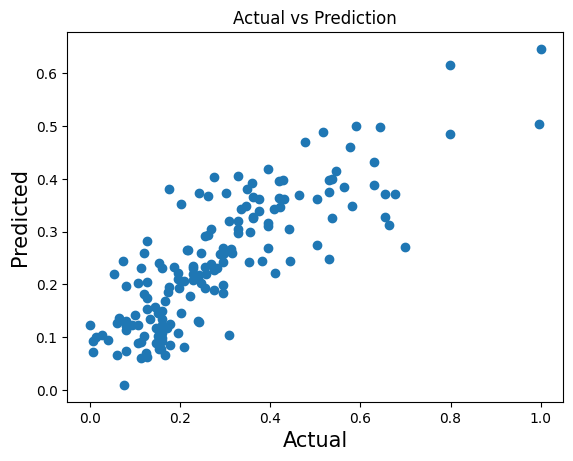

In [52]:
# Create a new figure
fig = plt.figure()

# Scatter plot of actual versus predicted values
plt.scatter(y_test, prediction)

# Set the title and labels for the plot
plt.title('Actual vs Prediction')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)